#### 평균값 대처

1. 결측치를 해당 변수의 평균값으로 대체하는 방법
2. 변수의 분포를 유지하면서 결측치를 대체.
3. 변수의 중심 경향을 나타내기 때문에 전반적인 패턴을 유지할 수 있음.
4. 결측치가 아닌 유효한 데이터의 평균값을 사용하기 때문에, 전체 데이터셋의 표본 편향을 대체적으로 줄임

- 한계

    1. 정보손실 : 특정 관측치 정보를 잃어버린다.
    2. 변동성 왜곡 : 대체된 평균값은 데이터의 중심 경향을 나타내므로 데이터의 변동성이 감소할 수 있다.
    3. 상관관계 왜곡 : 변수간 상관관계를 고려하지 않고 해당 변수의 평균값으로 대체한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. 데이터 생성

In [8]:
# 시계열 데이터 생성
dates = pd.date_range('2023-01-01',periods=1000,freq='d')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates,'Value':values})
print(data)

          Date     Value
0   2023-01-01 -0.851617
1   2023-01-02 -0.441390
2   2023-01-03 -1.144574
3   2023-01-04  1.905272
4   2023-01-05  0.244137
..         ...       ...
995 2025-09-22 -0.048149
996 2025-09-23  0.994731
997 2025-09-24 -1.044012
998 2025-09-25  1.215595
999 2025-09-26  1.296976

[1000 rows x 2 columns]


#### 2. 결측치 생성

In [9]:
data.loc[50:100,'Value'] = np.nan
print(data.loc[100:200])

          Date     Value
100 2023-04-11       NaN
101 2023-04-12  1.236765
102 2023-04-13  0.450354
103 2023-04-14  0.665812
104 2023-04-15  0.546815
..         ...       ...
196 2023-07-16  0.333421
197 2023-07-17 -0.435927
198 2023-07-18 -0.707708
199 2023-07-19  2.139019
200 2023-07-20 -0.448767

[101 rows x 2 columns]


#### 3. 결측치 처리 (평균값 대체)

In [10]:
mean_value = data['Value'].mean()
print("전체 데이터 평균값", 'mean_value')

data['Value_filled'] = data['Value'].fillna(mean_value)
print(data.loc[100:200])

전체 데이터 평균값 mean_value
          Date     Value  Value_filled
100 2023-04-11       NaN      0.012417
101 2023-04-12  1.236765      1.236765
102 2023-04-13  0.450354      0.450354
103 2023-04-14  0.665812      0.665812
104 2023-04-15  0.546815      0.546815
..         ...       ...           ...
196 2023-07-16  0.333421      0.333421
197 2023-07-17 -0.435927     -0.435927
198 2023-07-18 -0.707708     -0.707708
199 2023-07-19  2.139019      2.139019
200 2023-07-20 -0.448767     -0.448767

[101 rows x 3 columns]


#### 4. 시각화

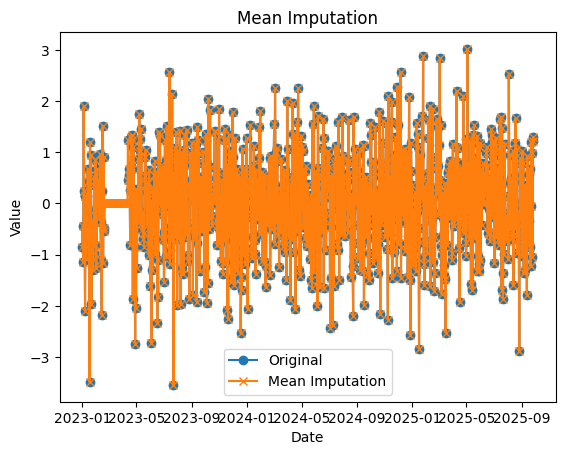

In [11]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Mean Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean Imputation')
plt.legend()
plt.show()

- 결측치가 평균값으로 대체된 것을 확인할 수 있다.